<a href="https://colab.research.google.com/github/terence-mitterrand/terence-mitterrand-DataScience-GenAI-Submissions/blob/main/Practice_1/Logistic_Regression_and_Decision_Trees_COMPLETED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_classification # generate synthetic data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay as CM, f1_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
import pandas as pd


In [55]:
new_df = pd.read_csv('/content/loan_data.csv')
display(new_df.head())

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,40,17.2,25579,692,5.3,895,10820,0,0,0,600,17.02,0.423,0.023,0.008,1
1,33,7.3,43087,627,3.5,169,16550,0,1,0,53300,14.10,0.384,1.237,0.412,0
2,42,1.1,20840,689,8.4,17,7852,0,0,0,2100,18.33,0.377,0.101,0.034,1
3,53,0.5,29147,692,9.8,1480,11603,0,1,0,2900,18.74,0.398,0.099,0.033,1
4,32,12.5,63657,630,7.2,209,12424,0,0,0,99600,13.92,0.195,1.565,0.522,1


In [56]:
# Separate features (X_new) and target (y_new) from new_df
X_new = new_df.drop('loan_status', axis=1)
y_new = new_df['loan_status']

display(X_new.head())
display(y_new.head())

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
0,40,17.2,25579,692,5.3,895,10820,0,0,0,600,17.02,0.423,0.023,0.008
1,33,7.3,43087,627,3.5,169,16550,0,1,0,53300,14.10,0.384,1.237,0.412
2,42,1.1,20840,689,8.4,17,7852,0,0,0,2100,18.33,0.377,0.101,0.034
3,53,0.5,29147,692,9.8,1480,11603,0,1,0,2900,18.74,0.398,0.099,0.033
4,32,12.5,63657,630,7.2,209,12424,0,0,0,99600,13.92,0.195,1.565,0.522


,loan_status
0,1
1,0
2,1
3,1
4,1


In [57]:
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state=42)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(40000, 15)
(10000, 15)
(40000,)
(10000,)


In [58]:
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the data
normal_data = scaler.fit_transform(X_new)

# recreate X_new using the scaled data and original feature names
X_new_scaled = pd.DataFrame(normal_data, columns=X_new.columns)
display(X_new_scaled.head())

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
0,0.423077,0.431078,0.045017,0.685259,0.176667,0.002983,0.065897,0.0,0.000000,0.0,0.001005,0.648235,0.527569,0.007526,0.007530
1,0.288462,0.182957,0.119519,0.555777,0.116667,0.000563,0.100990,0.0,0.111111,0.0,0.530653,0.476471,0.478697,0.616658,0.615964
2,0.461538,0.027569,0.024851,0.679283,0.280000,0.000057,0.047721,0.0,0.000000,0.0,0.016080,0.725294,0.469925,0.046663,0.046687
3,0.673077,0.012531,0.060200,0.685259,0.326667,0.004933,0.070693,0.0,0.111111,0.0,0.024121,0.749412,0.496241,0.045660,0.045181
4,0.269231,0.313283,0.207051,0.561753,0.240000,0.000697,0.075721,0.0,0.000000,0.0,0.995980,0.465882,0.241855,0.781234,0.781627


In [59]:
from sklearn.model_selection  import train_test_split

X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(X_new_scaled, y_new, test_size = 0.2, random_state=42)

# print the shapes to check everything is OK
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")
print(f"Shape of Y_train_scaled: {Y_train_scaled.shape}")
print(f"Shape of Y_test_scaled: {Y_test_scaled.shape}")

Shape of X_train_scaled: (40000, 15)
Shape of X_test_scaled: (10000, 15)
Shape of Y_train_scaled: (40000,)
Shape of Y_test_scaled: (10000,)


In [60]:
from sklearn.linear_model import LogisticRegression as LogR
# create the model
logR_algo = LogR(penalty='l2')
logR_algo

LogisticRegression()

In [61]:
from sklearn.tree import DecisionTreeClassifier as DTC

# create the model
DTC_algo = DTC()
DTC_algo

DecisionTreeClassifier()

In [62]:
logR_model = logR_algo.fit(X_train_scaled, Y_train_scaled)
display(logR_model)

LogisticRegression()

In [80]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Configure the Lasso (L1 regularization) model
# Alpha is the regularization strength; a higher value means stronger regularization.
# You can tune this hyperparameter.
lasso_model = Lasso(alpha=0.1, random_state=42)

# Learn the model from the training data
lasso_model.fit(X_train, Y_train)

# Predict the data on the test set
Y_pred_lasso = lasso_model.predict(X_test)

# Calculate R^2 by comparing the predicted values and real values
r2_lasso = r2_score(Y_test, Y_pred_lasso)

print(f"Lasso Regression R-squared score: {r2_lasso:.4f}")

Lasso Regression R-squared score: 0.3771


In [81]:
# print the beta values of the model (co-efficients)
betas_l1 = lasso_model.coef_
counter = 0
print("Beta weights/co-efficients - LASSO")
print("-----------------------------------------")
for col in X_new.columns:
    print(f"{col} : {round(betas_l1[counter], 4)}")
    counter +=1

Beta weights/co-efficients - LASSO
-----------------------------------------
age : 0.0021
years_employed : 0.001
annual_income : 0.0
credit_score : 0.0034
credit_history_years : 0.0069
savings_assets : 0.0
current_debt : -0.0
defaults_on_file : -0.0
delinquencies_last_2yrs : -0.0
derogatory_marks : -0.0
loan_amount : -0.0
interest_rate : 0.0007
debt_to_income_ratio : -0.0
loan_to_income_ratio : -0.0
payment_to_income_ratio : -0.0


In [82]:
from sklearn.metrics import accuracy_score

# predict the test data using the scaled test features
predict = logR_model.predict(X_test_scaled)

# separate the first five predictions and the first five real values in Y_test_logR
print("First five predictions vs. real values:")
for i in range(5):
  print(f'Predicted: {round(predict[i],2)}')
  print(f'Real: {Y_test_scaled.iloc[i]}') # Use .iloc for positional indexing
  print("\n")

print(f'Accuracy: {round(accuracy_score(Y_test_scaled, predict),2)}')


First five predictions vs. real values:
Predicted: 1
Real: 1


Predicted: 1
Real: 1


Predicted: 0
Real: 0


Predicted: 0
Real: 0


Predicted: 1
Real: 1


Accuracy: 0.84


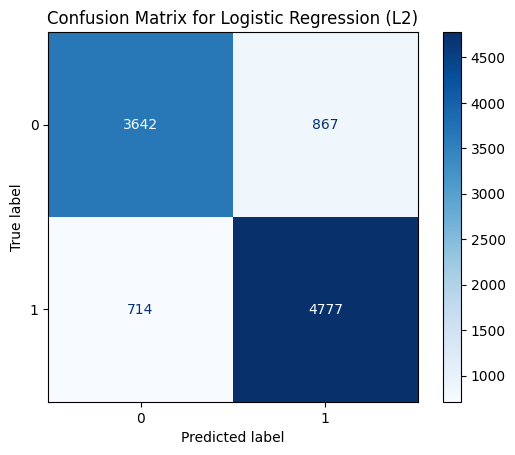

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(Y_test_scaled, predict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logR_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression (L2)')
plt.show()

In [84]:
DTC_model = DTC_algo.fit(X_train_scaled, Y_train_scaled)
display(DTC_model)

DecisionTreeClassifier()

In [69]:
from sklearn.metrics import accuracy_score

# predict the test data using the scaled test features
predict = DTC_model.predict(X_test_scaled)

# separate the first five predictions and the first five real values in Y_test_scaled
print("First five predictions vs. real values:")
for i in range(5):
  print(f'Predicted: {round(predict[i],2)}')
  print(f'Real: {Y_test_scaled.iloc[i]}') # Use .iloc for positional indexing
  print("\n")

print(f'Accuracy: {round(accuracy_score(Y_test_scaled, predict),2)}')


First five predictions vs. real values:
Predicted: 1
Real: 1


Predicted: 1
Real: 1


Predicted: 0
Real: 0


Predicted: 0
Real: 0


Predicted: 1
Real: 1


Accuracy: 0.84


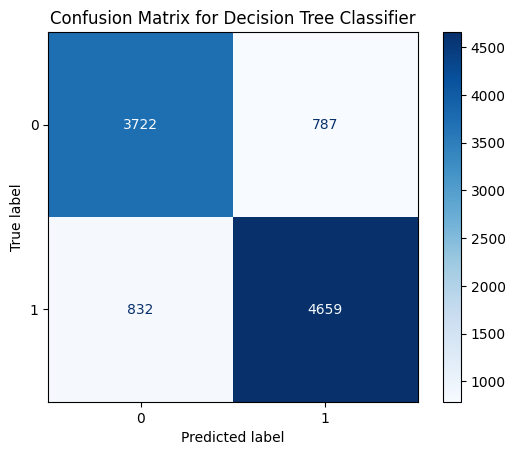

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix using the predictions from the Decision Tree model
cm_dtc = confusion_matrix(Y_test_scaled, predict)

# Display the confusion matrix
disp_dtc = ConfusionMatrixDisplay(confusion_matrix=cm_dtc, display_labels=DTC_model.classes_)
disp_dtc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [71]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1-score for Decision Tree using micro average
precision_micro_dtc, recall_micro_dtc, f1_score_micro_dtc, _ = precision_recall_fscore_support(Y_test_scaled, predict, average='micro')

print(f"Decision Tree Micro-averaged Precision: {round(precision_micro_dtc, 2)}")
print(f"Decision Tree Micro-averaged Recall: {round(recall_micro_dtc, 2)}")
print(f"Decision Tree Micro-averaged F1-score: {round(f1_score_micro_dtc, 2)}")
print("\n")

# Calculate precision, recall, and F1-score for Decision Tree using macro average
precision_macro_dtc, recall_macro_dtc, f1_score_macro_dtc, _ = precision_recall_fscore_support(Y_test_scaled, predict, average='macro')

print(f"Decision Tree Macro-averaged Precision: {round(precision_macro_dtc, 2)}")
print(f"Decision Tree Macro-averaged Recall: {round(recall_macro_dtc, 2)}")
print(f"Decision Tree Macro-averaged F1-score: {round(f1_score_macro_dtc, 2)}")

Decision Tree Micro-averaged Precision: 0.84
Decision Tree Micro-averaged Recall: 0.84
Decision Tree Micro-averaged F1-score: 0.84


Decision Tree Macro-averaged Precision: 0.84
Decision Tree Macro-averaged Recall: 0.84
Decision Tree Macro-averaged F1-score: 0.84


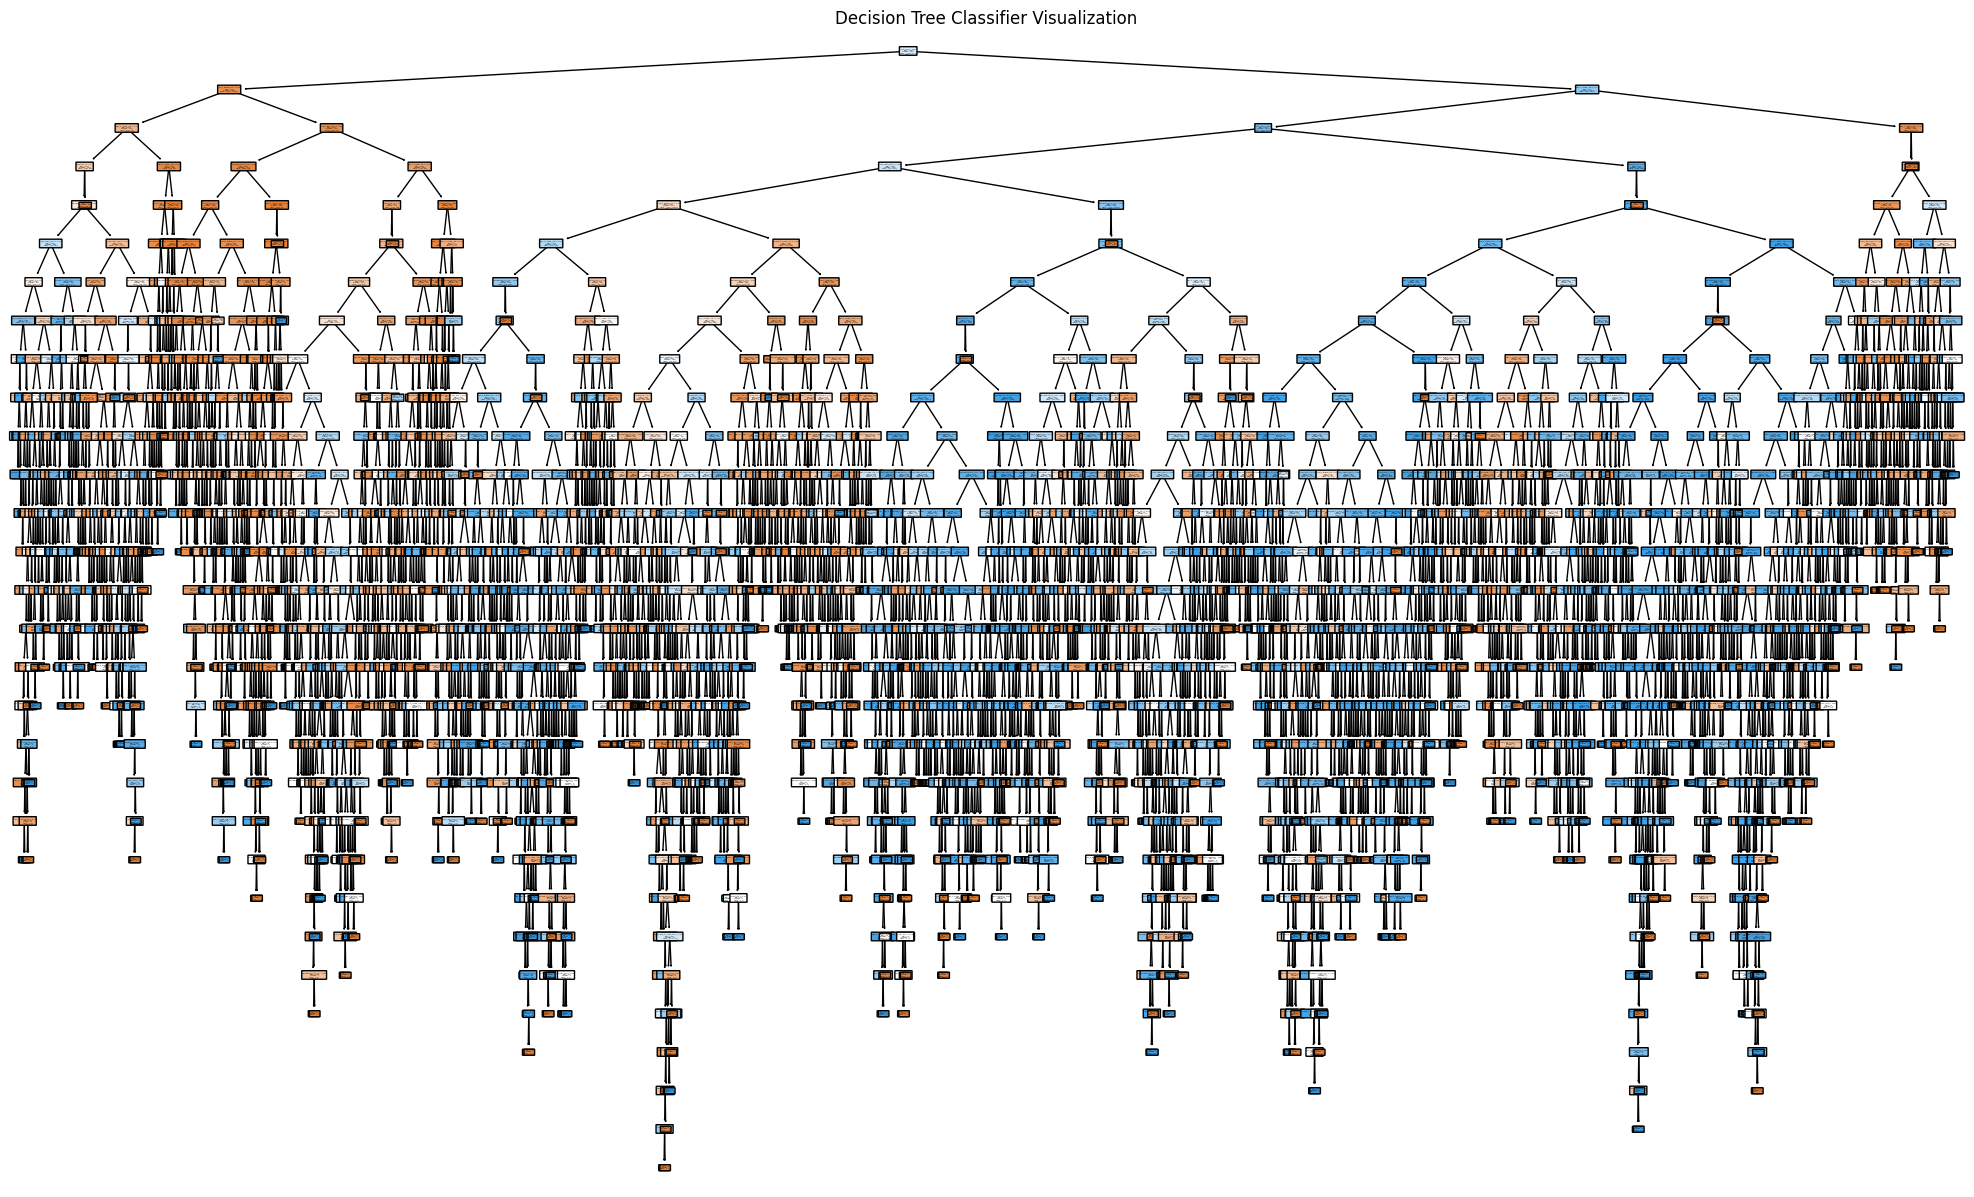

In [72]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15)) # Increased figure size for better readability
plot_tree(DTC_model, filled=True, feature_names=X_train_scaled.columns.tolist(), class_names=['0', '1'], rounded=True)
plt.title('Decision Tree Classifier Visualization')
plt.show()

In [73]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# this is the list of parameters we will tune. Some are fixed values some are distributions
tuned_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(3, 9),  # Draw from a uniform distribution between 3 and 8 (exclusive for 9)
    'min_samples_split': randint(3, 9),  # Draw from a uniform distribution between 3 and 8 (exclusive for 9)
    'max_features': ['sqrt', 'log2', None]
}

# we will tune against f1_macro (to find the best choice)
score = 'f1_macro' # arbitrary choice

print(f"Tuning hyperparameters for {score}")
print("\n")

# do the search using 5 folds/chunks
# Using DTC_algo which was previously initialized
clf = RandomizedSearchCV(DTC_algo, tuned_parameters, cv=5, random_state=1984,
                         scoring= score, n_iter=20, refit=True)

# pass the scaled data to fit/train
clf.fit(X_train_scaled, Y_train_scaled)

print("Best parameters set found on the training set:")
print(clf.best_params_)

Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_split': 7}


In [74]:
# Initialize a new Decision Tree Classifier with the best parameters found
DTC_optimized_algo = DTC(**clf.best_params_)

# Train the optimized model using the scaled training data
DTC_optimized_model = DTC_optimized_algo.fit(X_train_scaled, Y_train_scaled)

display(DTC_optimized_model)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=7)

In [75]:
from sklearn.metrics import accuracy_score

# predict the test data using the optimized Decision Tree model and scaled test features
predict_optimized_dtc = DTC_optimized_model.predict(X_test_scaled)

# separate the first five predictions and the first five real values in Y_test_scaled
print("First five predictions (Optimized DTC) vs. real values:")
for i in range(5):
  print(f'Predicted: {round(predict_optimized_dtc[i],2)}')
  print(f'Real: {Y_test_scaled.iloc[i]}') # Use .iloc for positional indexing
  print("\n")

# Calculate accuracy for the optimized Decision Tree model
accuracy_optimized_dtc = accuracy_score(Y_test_scaled, predict_optimized_dtc)

print(f'Accuracy (Optimized DTC): {round(accuracy_optimized_dtc,2)}')


First five predictions (Optimized DTC) vs. real values:
Predicted: 1
Real: 1


Predicted: 1
Real: 1


Predicted: 0
Real: 0


Predicted: 0
Real: 0


Predicted: 1
Real: 1


Accuracy (Optimized DTC): 0.86


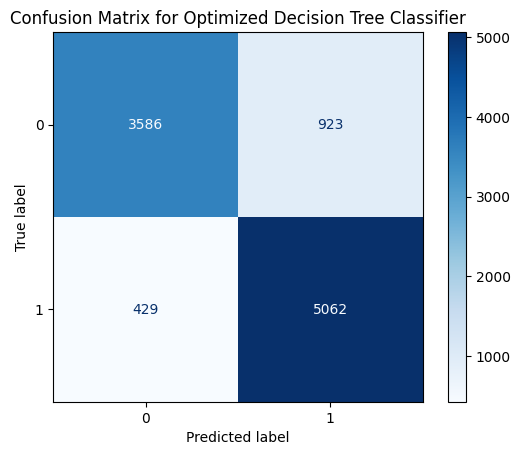

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix for the optimized Decision Tree model
cm_optimized_dtc = confusion_matrix(Y_test_scaled, predict_optimized_dtc)

# Display the confusion matrix
disp_optimized_dtc = ConfusionMatrixDisplay(confusion_matrix=cm_optimized_dtc, display_labels=DTC_optimized_model.classes_)
disp_optimized_dtc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Optimized Decision Tree Classifier')
plt.show()

In [77]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1-score for Optimized Decision Tree using micro average
precision_micro_optimized_dtc, recall_micro_optimized_dtc, f1_score_micro_optimized_dtc, _ = \
    precision_recall_fscore_support(Y_test_scaled, predict_optimized_dtc, average='micro')

print(f"Optimized Decision Tree Micro-averaged Precision: {round(precision_micro_optimized_dtc, 2)}")
print(f"Optimized Decision Tree Micro-averaged Recall: {round(recall_micro_optimized_dtc, 2)}")
print(f"Optimized Decision Tree Micro-averaged F1-score: {round(f1_score_micro_optimized_dtc, 2)}")
print("\n")

# Calculate precision, recall, and F1-score for Optimized Decision Tree using macro average
precision_macro_optimized_dtc, recall_macro_optimized_dtc, f1_score_macro_optimized_dtc, _ = \
    precision_recall_fscore_support(Y_test_scaled, predict_optimized_dtc, average='macro')

print(f"Optimized Decision Tree Macro-averaged Precision: {round(precision_macro_optimized_dtc, 2)}")
print(f"Optimized Decision Tree Macro-averaged Recall: {round(recall_macro_optimized_dtc, 2)}")
print(f"Optimized Decision Tree Macro-averaged F1-score: {round(f1_score_macro_optimized_dtc, 2)}")

Optimized Decision Tree Micro-averaged Precision: 0.86
Optimized Decision Tree Micro-averaged Recall: 0.86
Optimized Decision Tree Micro-averaged F1-score: 0.86


Optimized Decision Tree Macro-averaged Precision: 0.87
Optimized Decision Tree Macro-averaged Recall: 0.86
Optimized Decision Tree Macro-averaged F1-score: 0.86


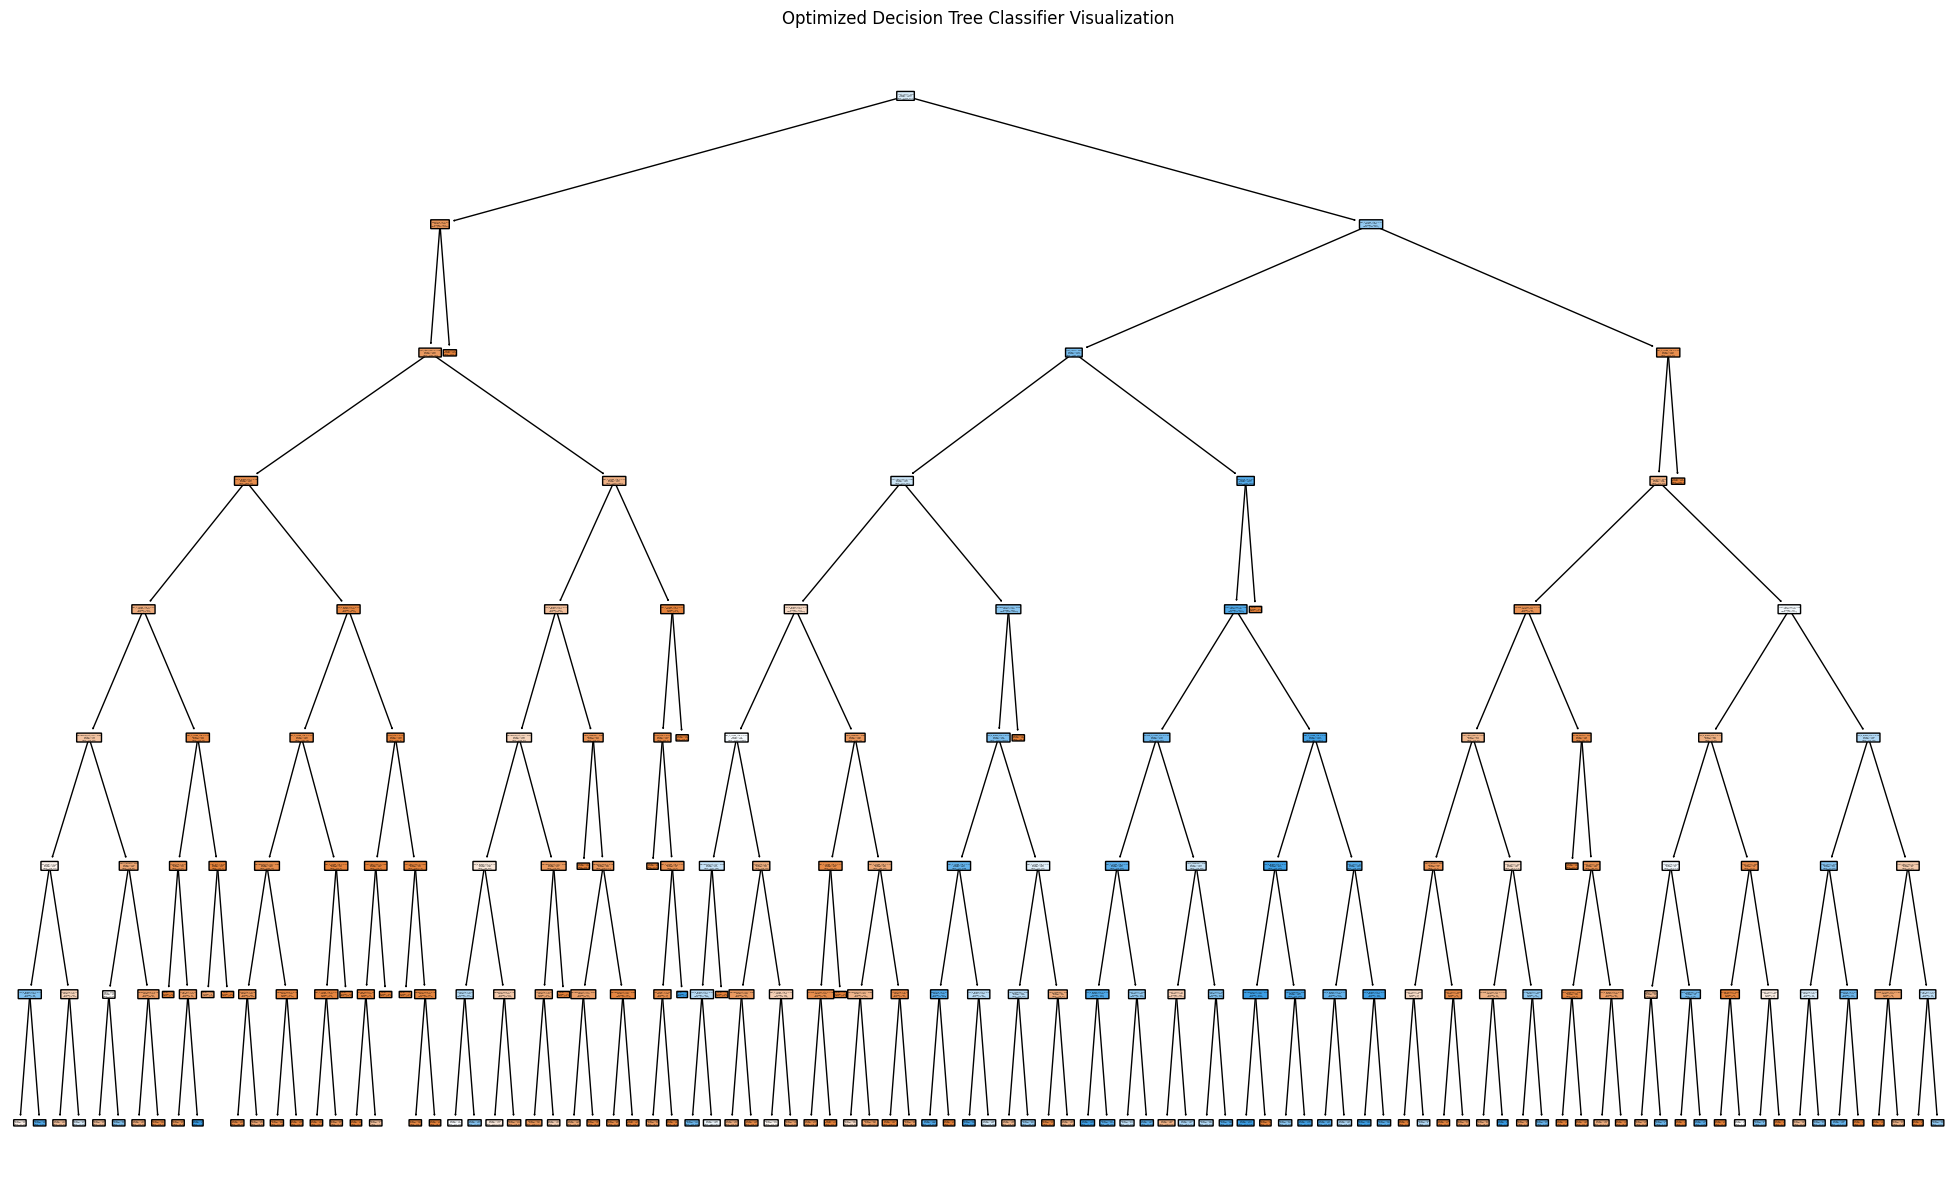

In [78]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15)) # Increased figure size for better readability
plot_tree(DTC_optimized_model, filled=True, feature_names=X_train_scaled.columns.tolist(), class_names=['0', '1'], rounded=True)
plt.title('Optimized Decision Tree Classifier Visualization')
plt.show()

In [79]:
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from xgboost import XGBClassifier as XGB
from sklearn.metrics import precision_recall_fscore_support

LogR_algo = LogR(random_state=42) # Added random_state for reproducibility
LogR_model = LogR_algo.fit(X_train_scaled, Y_train_scaled)

RF_algo = RF(random_state=42) # Added random_state for reproducibility
RF_model = RF_algo.fit(X_train_scaled, Y_train_scaled)

GBDT_algo = GBDT(random_state=42) # Added random_state for reproducibility
GBDT_model = GBDT_algo.fit(X_train_scaled, Y_train_scaled)

XGB_algo = XGB(random_state=42, eval_metric='logloss') # Added random_state and eval_metric for reproducibility and to suppress warnings
XGB_model = XGB_algo.fit(X_train_scaled, Y_train_scaled)

models = [LogR_model, RF_model, GBDT_model, XGB_model]
names = ['Logistic Regression', 'Random Forest', 'GBDT', 'XGBDT']

for i in range(len(models)):
  print(f"Model: {names[i]}")

  # predict based on training data (using scaled training data for consistency)
  predict = models[i].predict(X_train_scaled)

  # Calculate precision, recall, and F1-score
  precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train_scaled, predict, average='macro')
  print(f"Macro Precision: {round(precision, 4)}")
  print(f"Macro Recall: {round(recall, 4)}")
  print(f"Macro F1-score: {round(f1_score, 4)}")
  print("\n")

Model: Logistic Regression
Macro Precision: 0.8373
Macro Recall: 0.8344
Macro F1-score: 0.8356


Model: Random Forest
Macro Precision: 1.0
Macro Recall: 1.0
Macro F1-score: 1.0


Model: GBDT
Macro Precision: 0.8926
Macro Recall: 0.8893
Macro F1-score: 0.8906


Model: XGBDT
Macro Precision: 0.9373
Macro Recall: 0.9352
Macro F1-score: 0.9361


